In [1]:
import copy
import json
import sys
sys.path.append("../")

from models import DiffusivityData
from constants import *
from help_functions import *
from pathlib import Path
from optimize import Optimizer
from plots import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

## Prepare the data in DiffusionData object.

In [2]:
# Define a DiffusionData object.
# elements = ["Ag", "Cu"]
elements = ["Fe", "Ni"]
# elements = ["Co", "Fe"]
system = elements[0] + elements[1]
phase = "FCC_A1"
diffusion_data = DiffusivityData(elements)
# load data
datafile = f"./{system}_diffusion_coefficient_data.xlsx"
diffusion_data.load_data_from_excel(datafile)

# thermodynamic interaction parameter datafile
thermo_inter_param_file = f"./{system}_thermodynamic_interaction_parameters_3.json"
# thermo_inter_param_file = f"./{system}_thermodynamic_interaction_parameters_no_magnetic.json"
diffusion_data.load_interaction_parameters(thermo_inter_param_file)
#
# # calculate end member diffusion coefficient data.
# end_member_file = "./end_member_database.json"
end_member_file = "./all_end_members_database.json"
diffusion_data.end_member_calc(end_member_file)


In [7]:
diffusion_data.thermodynamic_interaction_parameters

{'end member': {'G': {'Fe': 0, 'Ni': 0},
  'TC': {'Fe': '67', 'Ni': '627'},
  'BMAGN': {'Fe': '0.7', 'Ni': '0.61'}},
 'FeNi': {'FCC_A1': {'excess': {'L0': '-12054 + 3.27*T',
    'L1': '11082 - 4.45*T',
    'L2': '-725.8'},
   'TC': {'L0': 2133, 'L1': -682},
   'BMAGN': {'L0': 9.55, 'L1': 7.23, 'L2': 5.93, 'L3': 6.18}}},
 'comment': 'Yang, Bo, et al. Experimental Investigation and Thermodynamic Modelling of the Fe-Ni-Ta System. This is the one Thermo-Calc used.'}

In [8]:
""" using Thermo-Calc owned databases. """
tc_database="TCNI11"
diffusion_data.thermodynamic_factor_calc(database_mode="calphad", database=tc_database)
tc_diffusion_data = copy.deepcopy(diffusion_data)

""" read self defined database """
diffusion_data.thermodynamic_factor_calc()
user_diffusion_data = copy.deepcopy(diffusion_data)

diffusion_data.data

20:47:43,607 [Thread-1] INFO  CalculationEngine: Starting Thermo-Calc 2024b, Java-version: 21.0.2
20:47:45,143 [Thread-1] INFO  SystemBuilder: Found matching previous system
20:47:47,103 [Thread-1] INFO  JavaWrapper: *** Invoking Gibbs Energy System v6 ***
20:47:48,296 [pool-4-thread-1] INFO  CalculationEngine: Performing batch equilibrium calculation. Logging every 10th equilibrium...
20:47:48,312 [pool-4-thread-1] INFO  CalculationEngine: Performing batch equilibrium calculation. Logging every 10th equilibrium...
20:47:48,328 [pool-4-thread-1] INFO  CalculationEngine: Performing batch equilibrium calculation. Logging every 10th equilibrium...
20:47:48,343 [pool-4-thread-1] INFO  CalculationEngine: Performing batch equilibrium calculation. Logging every 10th equilibrium...
20:47:48,359 [pool-4-thread-1] INFO  CalculationEngine: Performing batch equilibrium calculation. Logging every 10th equilibrium...
20:47:48,359 [pool-4-thread-1] INFO  CalculationEngine: Performing batch equilibriu

,Literature,Dtype,Element,A_mp,T_C,Dexp,TF,Weight,comp_A_mf,comp_B_mf,temp_celsius,temp_kelvin
18,Ustad & Sorum,DC,AB,90.0,1110,9.900000e-16,0.963432,1.0,0.900,0.100,1110.0,1383.0
19,Ustad & Sorum,DC,AB,80.0,1110,1.700000e-15,0.974042,1.0,0.800,0.200,1110.0,1383.0
20,Ustad & Sorum,DC,AB,70.0,1110,3.280000e-15,1.032009,1.0,0.700,0.300,1110.0,1383.0
21,Ustad & Sorum,DC,AB,60.0,1110,4.660000e-15,1.148484,1.0,0.600,0.400,1110.0,1383.0
22,Ustad & Sorum,DC,AB,50.0,1110,7.450000e-15,1.314358,1.0,0.500,0.500,1110.0,1383.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440,Million et al.,DT,B,54.7,1305,5.150000e-14,1.189941,1.0,0.547,0.453,1305.0,1578.0
441,Million et al.,DT,B,39.5,1305,7.200000e-14,1.356276,1.0,0.395,0.605,1305.0,1578.0
442,Million et al.,DT,B,30.0,1305,1.220000e-13,1.404891,1.0,0.300,0.700,1305.0,1578.0
443,Million et al.,DT,B,24.7,1305,6.870000e-14,1.398446,1.0,0.247,0.753,1305.0,1578.0


In [9]:
tc_diffusion_data.data

,Literature,Dtype,Element,A_mp,T_C,Dexp,TF,Weight,comp_A_mf,comp_B_mf,temp_celsius,temp_kelvin
18,Ustad & Sorum,DC,AB,90.0,1110,9.900000e-16,0.964989,1.0,0.900,0.100,1110.0,1383.0
19,Ustad & Sorum,DC,AB,80.0,1110,1.700000e-15,0.984579,1.0,0.800,0.200,1110.0,1383.0
20,Ustad & Sorum,DC,AB,70.0,1110,3.280000e-15,1.048236,1.0,0.700,0.300,1110.0,1383.0
21,Ustad & Sorum,DC,AB,60.0,1110,4.660000e-15,1.151412,1.0,0.600,0.400,1110.0,1383.0
22,Ustad & Sorum,DC,AB,50.0,1110,7.450000e-15,1.290287,1.0,0.500,0.500,1110.0,1383.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440,Million et al.,DT,B,54.7,1305,5.150000e-14,1.184095,1.0,0.547,0.453,1305.0,1578.0
441,Million et al.,DT,B,39.5,1305,7.200000e-14,1.336035,1.0,0.395,0.605,1305.0,1578.0
442,Million et al.,DT,B,30.0,1305,1.220000e-13,1.392363,1.0,0.300,0.700,1305.0,1578.0
443,Million et al.,DT,B,24.7,1305,6.870000e-14,1.393677,1.0,0.247,0.753,1305.0,1578.0


## compare tc-calculated and self-calculated thermodynamic factor

Text(0.5, 1.0, './FeNi_thermodynamic_interaction_parameters_3.json')

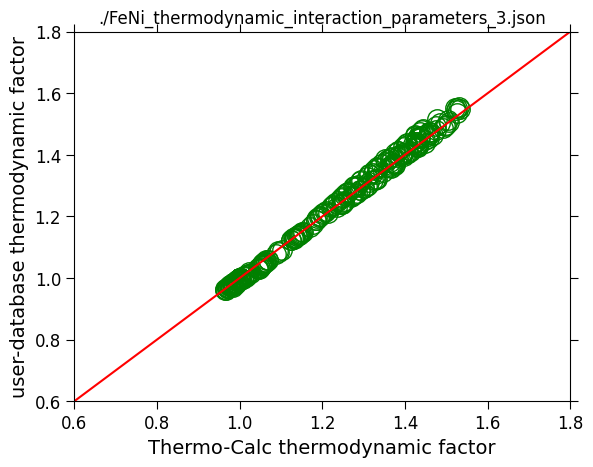

In [10]:
plt.rcParams["markers.fillstyle"] = "none"
tf_tc = tc_diffusion_data.data.TF
tf_self = user_diffusion_data.data.TF
# tf_self = user_diffusion_data.data.TF
# comps_2 = diffusion_data.data.comp_B_mf
# tf_self[(comps_2 == 0) | (comps_2 == 1)] = 1
plt.plot(tf_tc, tf_self, markersize = 14, linewidth = 0,
         marker = "o", markeredgecolor="green")
line_x = np.linspace(0, 2, 10)
plt.plot(line_x, line_x, color="red")
plt.ylim(0.6, 1.8)
plt.xlim(0.6, 1.8)
plt.xlabel("Thermo-Calc thermodynamic factor")
plt.ylabel("user-database thermodynamic factor")
plt.title(thermo_inter_param_file)
# plt.savefig(f"./{system}_Thermo-calc vs user-database.png", dpi = 400)

## Optimize the parameters using Optimizer object


In [11]:
optimizer = Optimizer(diffusion_data)


In [12]:
optimizer.diffusivity_data.data

,Literature,Dtype,Element,A_mp,T_C,Dexp,TF,Weight,comp_A_mf,comp_B_mf,temp_celsius,temp_kelvin
18,Ustad & Sorum,DC,AB,90.0,1110,9.900000e-16,0.963432,1.0,0.900,0.100,1110.0,1383.0
19,Ustad & Sorum,DC,AB,80.0,1110,1.700000e-15,0.974042,1.0,0.800,0.200,1110.0,1383.0
20,Ustad & Sorum,DC,AB,70.0,1110,3.280000e-15,1.032009,1.0,0.700,0.300,1110.0,1383.0
21,Ustad & Sorum,DC,AB,60.0,1110,4.660000e-15,1.148484,1.0,0.600,0.400,1110.0,1383.0
22,Ustad & Sorum,DC,AB,50.0,1110,7.450000e-15,1.314358,1.0,0.500,0.500,1110.0,1383.0
...,...,...,...,...,...,...,...,...,...,...,...,...
440,Million et al.,DT,B,54.7,1305,5.150000e-14,1.189941,1.0,0.547,0.453,1305.0,1578.0
441,Million et al.,DT,B,39.5,1305,7.200000e-14,1.356276,1.0,0.395,0.605,1305.0,1578.0
442,Million et al.,DT,B,30.0,1305,1.220000e-13,1.404891,1.0,0.300,0.700,1305.0,1578.0
443,Million et al.,DT,B,24.7,1305,6.870000e-14,1.398446,1.0,0.247,0.753,1305.0,1578.0


In [13]:
optimizer.init_params

array([0.58200865])

In [14]:
# predict diffusion coefficients at a given parameter value
diff_calc = optimizer.diffusivity_data.diffusion_coefs_calc([62922.572308])
diff_calc

18     8.894904e-16
19     1.776674e-15
20     3.307032e-15
21     5.756567e-15
22     9.183730e-15
           ...     
440    8.882594e-14
441    1.115047e-13
442    1.148527e-13
443    1.124532e-13
444    1.081436e-13
Length: 262, dtype: float64

In [15]:
# optimizer.init_params = [0.1, 0.2]
# optimizer.model="2-para"
# optimizer.method = "least_squares"
optimizer.optimize()

# optimizer.method = "minimize"
# optimizer.optimize(method="Nelder-Mead")

In [16]:
optimizer.optimized_results

{'OptimizedResult':      message: `gtol` termination condition is satisfied.
      success: True
       status: 1
          fun: [-2.099e-01 -1.387e-01 ...  3.065e-01  5.725e-02]
            x: [ 4.978e+04]
         cost: 8.411795778257614
          jac: [[ 7.578e-06]
                [ 1.372e-05]
                ...
                [ 1.325e-05]
                [ 1.226e-05]]
         grad: [-2.833e-09]
   optimality: 2.832918709121984e-09
  active_mask: [ 0.000e+00]
         nfev: 19
         njev: 19,
 'mse': np.float64(8.411795778257614),
 'optimized_params': array([49781.50122974])}

In [17]:
df = diffusion_data.data

In [14]:
# df.plot(x = "Dexp", y = "D_1-para", kind="scatter", logx=True, logy=True)

C:\Users\ChuangyeWang\Desktop\Files\personal\dc_modeling\.venv\lib\site-packages\seaborn\relational.py:438: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('o').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.



<Axes: xlabel='Experimental D (m$^2$/s)', ylabel='Predicted D (m$^2$/s)'>

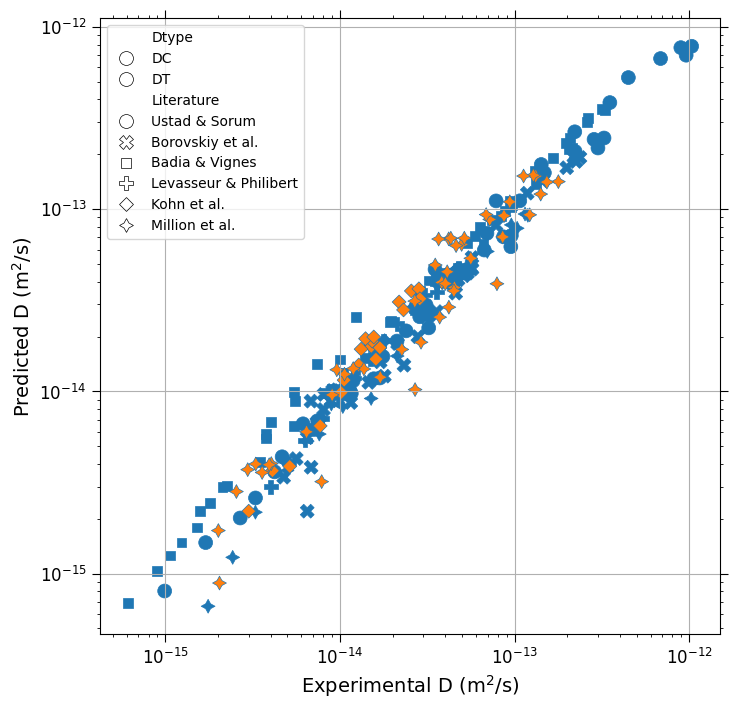

In [19]:
# matplotlib.rcParams['markers.fillstyle'] = "none"
# matplotlib.rcParams['lines.marker'] = None
matplotlib.rcParams['lines.markersize'] = 10
# matplotlib.rcParams['lines.markeredgecolor'] = "black"
fig, ax = plt.subplots(figsize=(8,8))
ax.set_xlabel("Experimental D (m$^2$/s)")
ax.set_ylabel("Predicted D (m$^2$/s)")
ax.set_xscale('log')
ax.set_yscale('log', base=10)
ax.grid(True)
# ax.set_fc("b")
sns.scatterplot(
    data=df, x="Dexp", y="D_1-para", hue="Dtype", style="Literature",
    ax=ax, palette="tab10", edgecolor="black", linewidth=0.5
)

In [20]:
diffusion_data.data

,Literature,Dtype,Element,A_mp,T_C,Dexp,TF,Weight,comp_A_mf,comp_B_mf,temp_celsius,temp_kelvin,D_1-para
18,Ustad & Sorum,DC,AB,90.0,1110,9.900000e-16,0.963432,1.0,0.900,0.100,1110.0,1383.0,8.025516e-16
19,Ustad & Sorum,DC,AB,80.0,1110,1.700000e-15,0.974042,1.0,0.800,0.200,1110.0,1383.0,1.479781e-15
20,Ustad & Sorum,DC,AB,70.0,1110,3.280000e-15,1.032009,1.0,0.700,0.300,1110.0,1383.0,2.601432e-15
21,Ustad & Sorum,DC,AB,60.0,1110,4.660000e-15,1.148484,1.0,0.600,0.400,1110.0,1383.0,4.375706e-15
22,Ustad & Sorum,DC,AB,50.0,1110,7.450000e-15,1.314358,1.0,0.500,0.500,1110.0,1383.0,6.901453e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,Million et al.,DT,B,54.7,1305,5.150000e-14,1.189941,1.0,0.547,0.453,1305.0,1578.0,6.930348e-14
441,Million et al.,DT,B,39.5,1305,7.200000e-14,1.356276,1.0,0.395,0.605,1305.0,1578.0,8.776944e-14
442,Million et al.,DT,B,30.0,1305,1.220000e-13,1.404891,1.0,0.300,0.700,1305.0,1578.0,9.306683e-14
443,Million et al.,DT,B,24.7,1305,6.870000e-14,1.398446,1.0,0.247,0.753,1305.0,1578.0,9.334021e-14


C:\Users\ChuangyeWang\Desktop\Files\personal\dc_modeling\.venv\lib\site-packages\seaborn\relational.py:438: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('o').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.



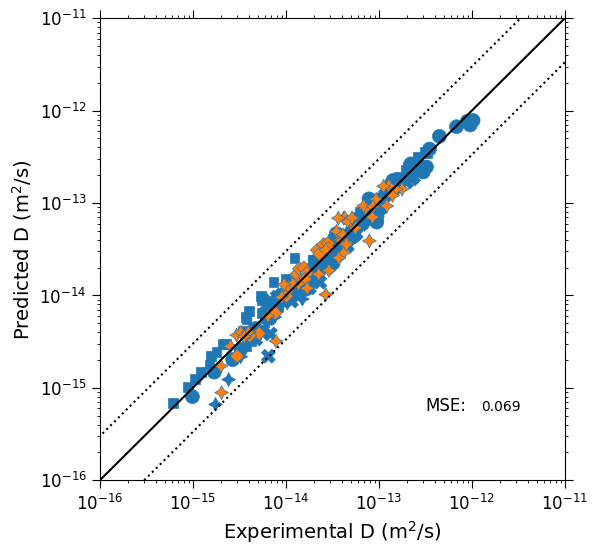

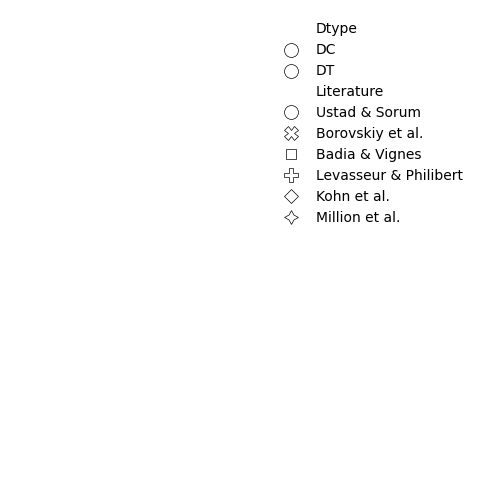

In [21]:
from plots import *
# matplotlib.rcdefaults()
# matplotlib.rcParams['xtick.top'] = True
# matplotlib.rcParams['ytick.right'] = True
# matplotlib.rcParams['xtick.major.size'] = 6
# matplotlib.rcParams['ytick.major.size'] = 6
# matplotlib.rcParams['lines.markersize'] = 10
# matplotlib.rcParams['xtick.minor.size'] = 2
# matplotlib.rcParams['ytick.minor.size'] = 2
# matplotlib.rcParams['xtick.labelsize'] = 12
# matplotlib.rcParams['ytick.labelsize'] = 12
# matplotlib.rcParams['axes.labelsize'] = 12
fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
fig_legend, ax_legend = plt.subplots(figsize=(6,6))
exp_vs_pred_plot(diffusion_data.data, "1-para", ax, ax_legend, hue='Dtype', style='Literature', )

# matplotlib.rcdefaults()

In [22]:
diffusion_data.end_dc.keys()

dict_keys(['AA', 'AB', 'BA', 'BB'])

In [33]:
comps = np.arange(0, 1.01, 0.01)
temps = diffusion_data.data.temp_celsius.unique()
grid_data = comp_temp_dataframe(comps, temps)

# calculate thermodynamic factor manually; comp_B corresponds to the second element in elements list
# grid_data["TF"] = thermodynamic_factor_user_defined(elements, phase, diffusion_data.thermodynamic_interaction_parameters, grid_data["comp_B_mf"], grid_data["temp_kelvin"])

# calculate thermodynamic factor using calphad engine
grid_data["TF"] = thermodynamic_factor_calphad_engine(grid_data, diffusion_data.elements, "TCNI11")

end_dc = end_member_diffusion_coefs(diffusion_data.elements, end_member_file, grid_data["temp_kelvin"])
all_dc = binary_diffusion_coefs(optimizer.optimized_results["optimized_params"], grid_data["comp_A_mf"],                                                    grid_data["temp_kelvin"], grid_data["TF"], end_dc)

grid_data = pd.concat([grid_data, pd.DataFrame(all_dc)], axis=1)

21:02:19,394 [Thread-1] INFO  CalculationEngine: Starting Thermo-Calc 2024b, Java-version: 21.0.2
21:02:20,927 [Thread-1] INFO  SystemBuilder: Found matching previous system
21:02:22,868 [Thread-1] INFO  JavaWrapper: *** Invoking Gibbs Energy System v6 ***
21:02:24,474 [pool-4-thread-1] INFO  CalculationEngine: Performing batch equilibrium calculation. Logging every 10th equilibrium...
21:02:24,489 [pool-4-thread-1] INFO  CalculationEngine: Performing batch equilibrium calculation. Logging every 10th equilibrium...
21:02:24,489 [pool-4-thread-1] INFO  CalculationEngine: Performing batch equilibrium calculation. Logging every 10th equilibrium...
21:02:24,489 [pool-4-thread-1] INFO  CalculationEngine: Performing batch equilibrium calculation. Logging every 10th equilibrium...
21:02:24,507 [pool-4-thread-1] INFO  CalculationEngine: Performing batch equilibrium calculation. Logging every 10th equilibrium...
21:02:24,507 [pool-4-thread-1] INFO  CalculationEngine: Performing batch equilibriu

In [34]:
grid_data

,comp_A_mf,comp_B_mf,temp_celsius,temp_kelvin,TF,DTA,DTB,DIA,DIB,DC
0,0.00,1.00,1110.0,1383.0,1.000000,6.687346e-15,3.269071e-15,6.687346e-15,3.269071e-15,6.687346e-15
1,0.01,0.99,1110.0,1383.0,1.043122,6.838219e-15,3.342511e-15,7.133099e-15,3.486648e-15,7.096634e-15
2,0.02,0.98,1110.0,1383.0,1.083647,6.986444e-15,3.414643e-15,7.570840e-15,3.700267e-15,7.493428e-15
3,0.03,0.97,1110.0,1383.0,1.121675,7.131704e-15,3.485312e-15,7.999456e-15,3.909388e-15,7.876754e-15
4,0.04,0.96,1110.0,1383.0,1.157322,7.273684e-15,3.554365e-15,8.417992e-15,4.113543e-15,8.245814e-15
...,...,...,...,...,...,...,...,...,...,...
1611,0.96,0.04,1175.0,1448.0,0.983888,3.297149e-15,1.791657e-15,3.244026e-15,1.762790e-15,1.822039e-15
1612,0.97,0.03,1175.0,1448.0,0.987228,3.110018e-15,1.690624e-15,3.070298e-15,1.669032e-15,1.711070e-15
1613,0.98,0.02,1175.0,1448.0,0.991031,2.931083e-15,1.593969e-15,2.904793e-15,1.579672e-15,1.606175e-15
1614,0.99,0.01,1175.0,1448.0,0.995290,2.760160e-15,1.501598e-15,2.747159e-15,1.494525e-15,1.507052e-15


In [42]:
literature_list = diffusion_data.data["Literature"].unique()[0:2]
x_type = "composition"
literature_list

array(['Ustad & Sorum', 'Borovskiy et al.'], dtype=object)

(0.0, 1.0)

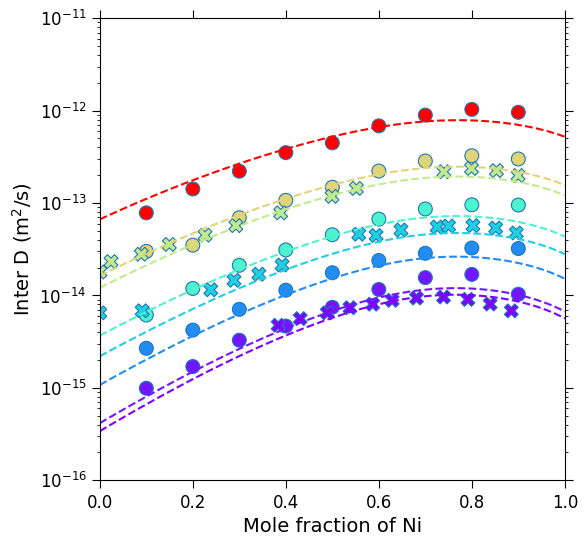

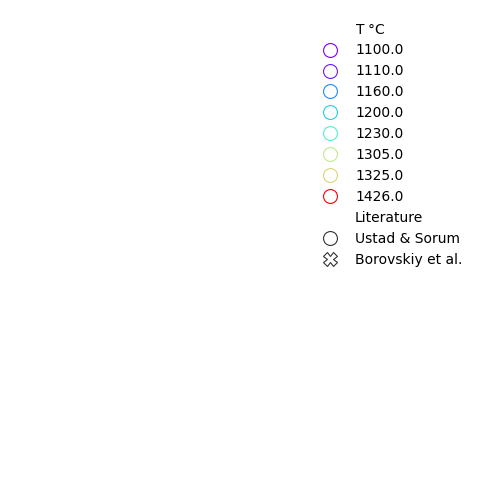

In [43]:
fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
fig_legend, ax_legend = plt.subplots(figsize=(6,6))
conditions_plot(diffusion_data, grid_data, literature_list, x_type, ax, ax_legend, diffusion_type="DC",
                element="", x_axis_element="B", palette="rainbow")
ax.set_xlim(0, 1)

In [44]:
# fig.savefig("plot_Oikawa et al.png", dpi=400)

In [47]:
comps = diffusion_data.data.comp_A_mf.unique()
temps = np.arange(diffusion_data.data.temp_celsius.min(), diffusion_data.data.temp_celsius.max() + 20, 20)
grid_data = comp_temp_dataframe(comps, temps)
grid_data["TF"] = thermodynamic_factor_user_defined(elements, phase,
    diffusion_data.thermodynamic_interaction_parameters, grid_data["comp_B_mf"], grid_data["temp_kelvin"])
# grid_data["TF"] = thermodynamic_factor_calphad_engine(grid_data, diffusion_data.elements, "TCAL7")
end_dc = end_member_diffusion_coefs(diffusion_data.elements, end_member_file, grid_data["temp_kelvin"])
all_dc = binary_diffusion_coefs(optimizer.optimized_results["optimized_params"], grid_data["comp_A_mf"],                                                    grid_data["temp_kelvin"], grid_data["TF"], end_dc)

grid_data = pd.concat([grid_data, pd.DataFrame(all_dc)], axis=1)

In [25]:
grid_data

,comp_A_mf,comp_B_mf,temp_celsius,temp_kelvin,TF,DTA,DTB,DIA,DIB,DC
0,0.991647,0.008353,653.0,926.0,0.966874,1.656938e-15,2.272997e-15,1.602051e-15,2.197702e-15,2.192727e-15
1,0.974463,0.025537,653.0,926.0,0.897954,1.876145e-15,2.481620e-15,1.684691e-15,2.228380e-15,2.214496e-15
2,0.966348,0.033652,653.0,926.0,0.865085,1.986133e-15,2.582291e-15,1.718174e-15,2.233902e-15,2.216547e-15
3,0.974702,0.025298,653.0,926.0,0.898918,1.872972e-15,2.478678e-15,1.683648e-15,2.228127e-15,2.214353e-15
4,0.955609,0.044391,653.0,926.0,0.821309,2.138088e-15,2.717270e-15,1.756031e-15,2.231718e-15,2.210602e-15
...,...,...,...,...,...,...,...,...,...,...
337,0.998939,0.001061,1013.0,1286.0,0.997737,9.384713e-13,1.379159e-12,9.363476e-13,1.376038e-12,1.375572e-12
338,0.990000,0.010000,1013.0,1286.0,0.978457,9.879032e-13,1.429893e-12,9.666210e-13,1.399089e-12,1.394765e-12
339,0.980000,0.020000,1013.0,1286.0,0.956469,1.045109e-12,1.487179e-12,9.996149e-13,1.422441e-12,1.413984e-12
340,0.960000,0.040000,1013.0,1286.0,0.911265,1.165469e-12,1.602975e-12,1.062051e-12,1.460735e-12,1.444787e-12


In [51]:
literature_list = diffusion_data.data["Literature"].unique()[0:1]
x_type = "temperature"
literature_list

array(['Ustad & Sorum'], dtype=object)

(5.0, 8.0)

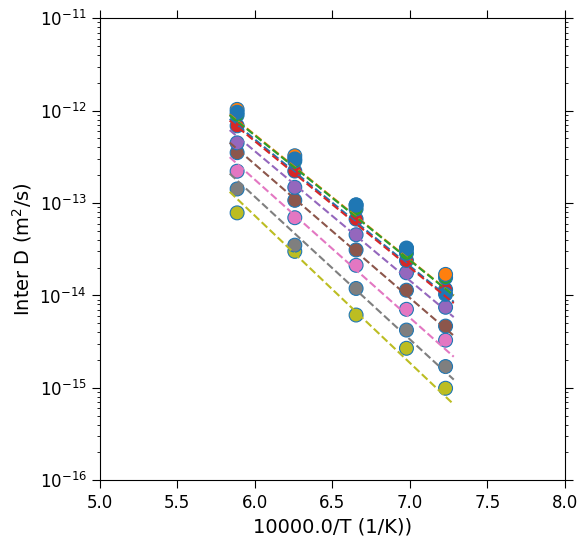

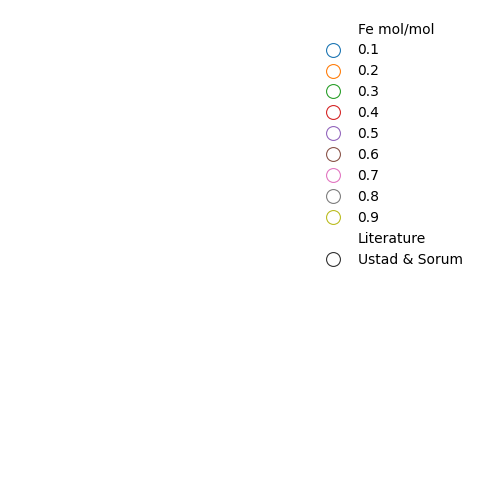

In [54]:

fig, ax = plt.subplots(figsize=(6,6))
ax.grid(False)
fig_legend, ax_legend = plt.subplots(figsize=(6,6))
conditions_plot(diffusion_data, grid_data, literature_list, x_type, ax, ax_legend, diffusion_type="DC",
                element="", x_axis_element="B", palette="tab10")
ax.set_xlim(5, 8)

In [28]:
# data_file = "C:/Users/ustcw/Desktop/Research/Binary_assessment/FCC_ub_params.xlsx"
# save_file = "all_end_members_database.json"
# end_member_database_from_excel_to_json(data_file, save_file)




In [ ]:
diffusion_data.data.iloc[0]["A_mp"]
